In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#from jupyterthemes import jtplot
#jtplot.style(theme="monokai",context="notebook",ticks=True,grid=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
upload=files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv


In [ ]:
import io
creditcard_df=pd.read_csv(io.BytesIO(upload['CC GENERAL.csv']))

In [ ]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
print("Maximum balance",creditcard_df['BALANCE'].max())
print("Minimum balance",creditcard_df['BALANCE'].min())
print("average balance",creditcard_df['BALANCE'].mean())

Maximum balance 19043.13856
Minimum balance 0.0
average balance 1564.4748276781038


In [ ]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']== creditcard_df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


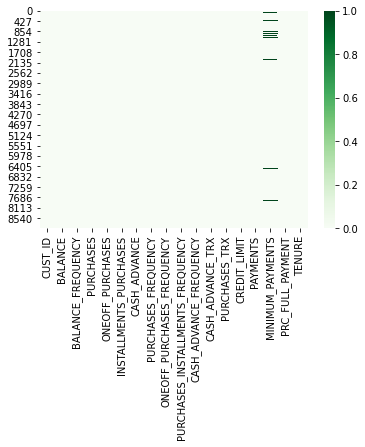

In [ ]:
sns.heatmap(creditcard_df.isnull(),cmap="Greens")

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True) ,'MINIMUM_PAYMENTS']=creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

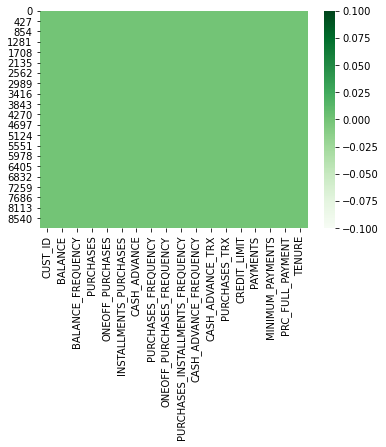

In [ ]:
sns.heatmap(creditcard_df.isnull(),cmap="Greens")

In [ ]:
creditcard_df.duplicated().sum()

0

In [ ]:
creditcard_df.drop(['CUST_ID'],axis=1,inplace=True)

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

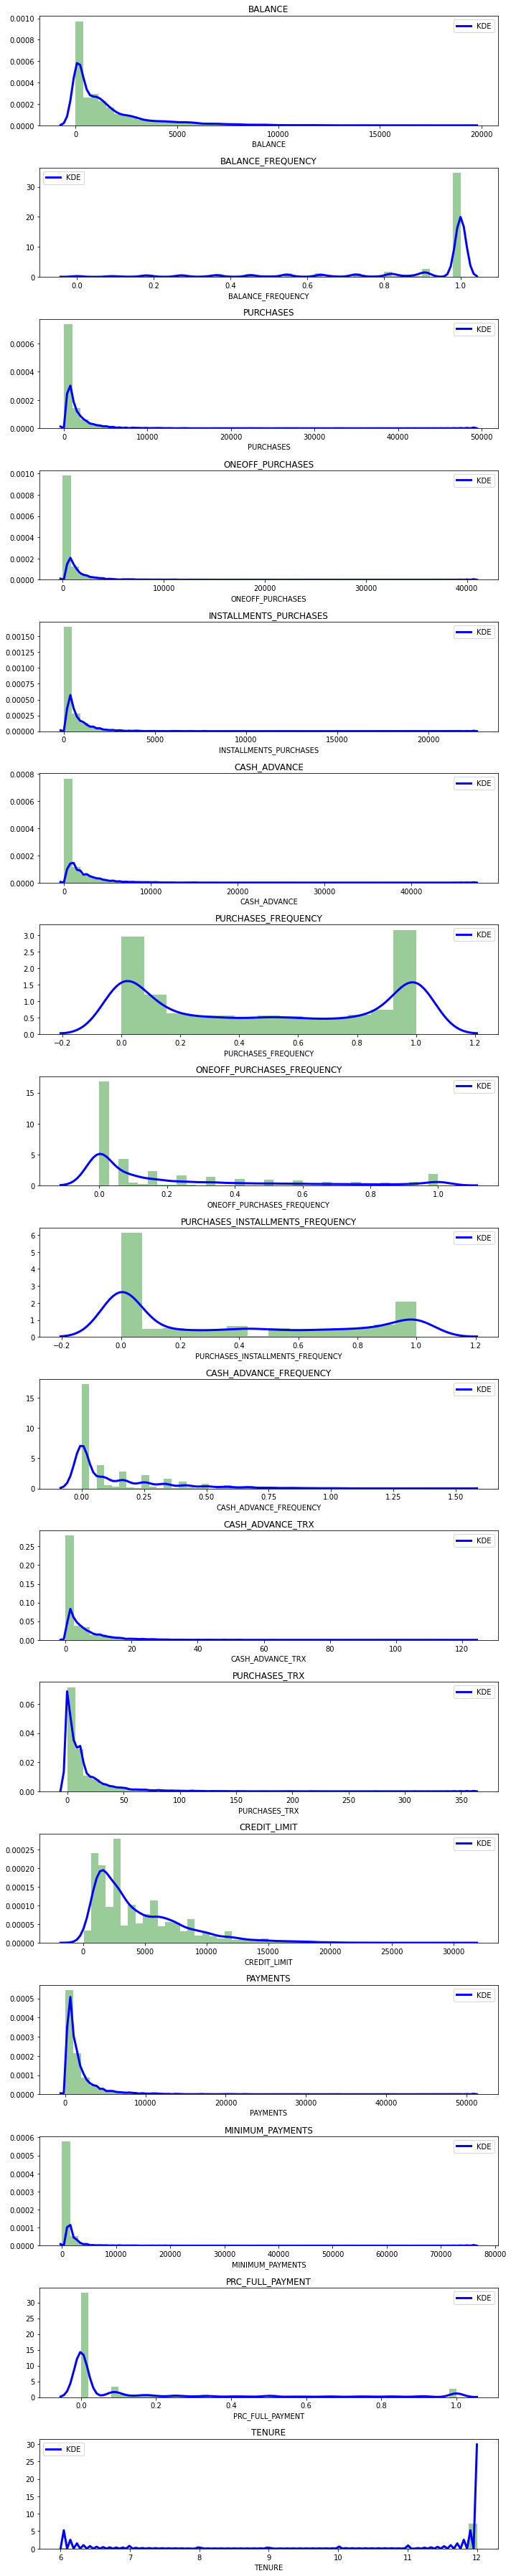

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

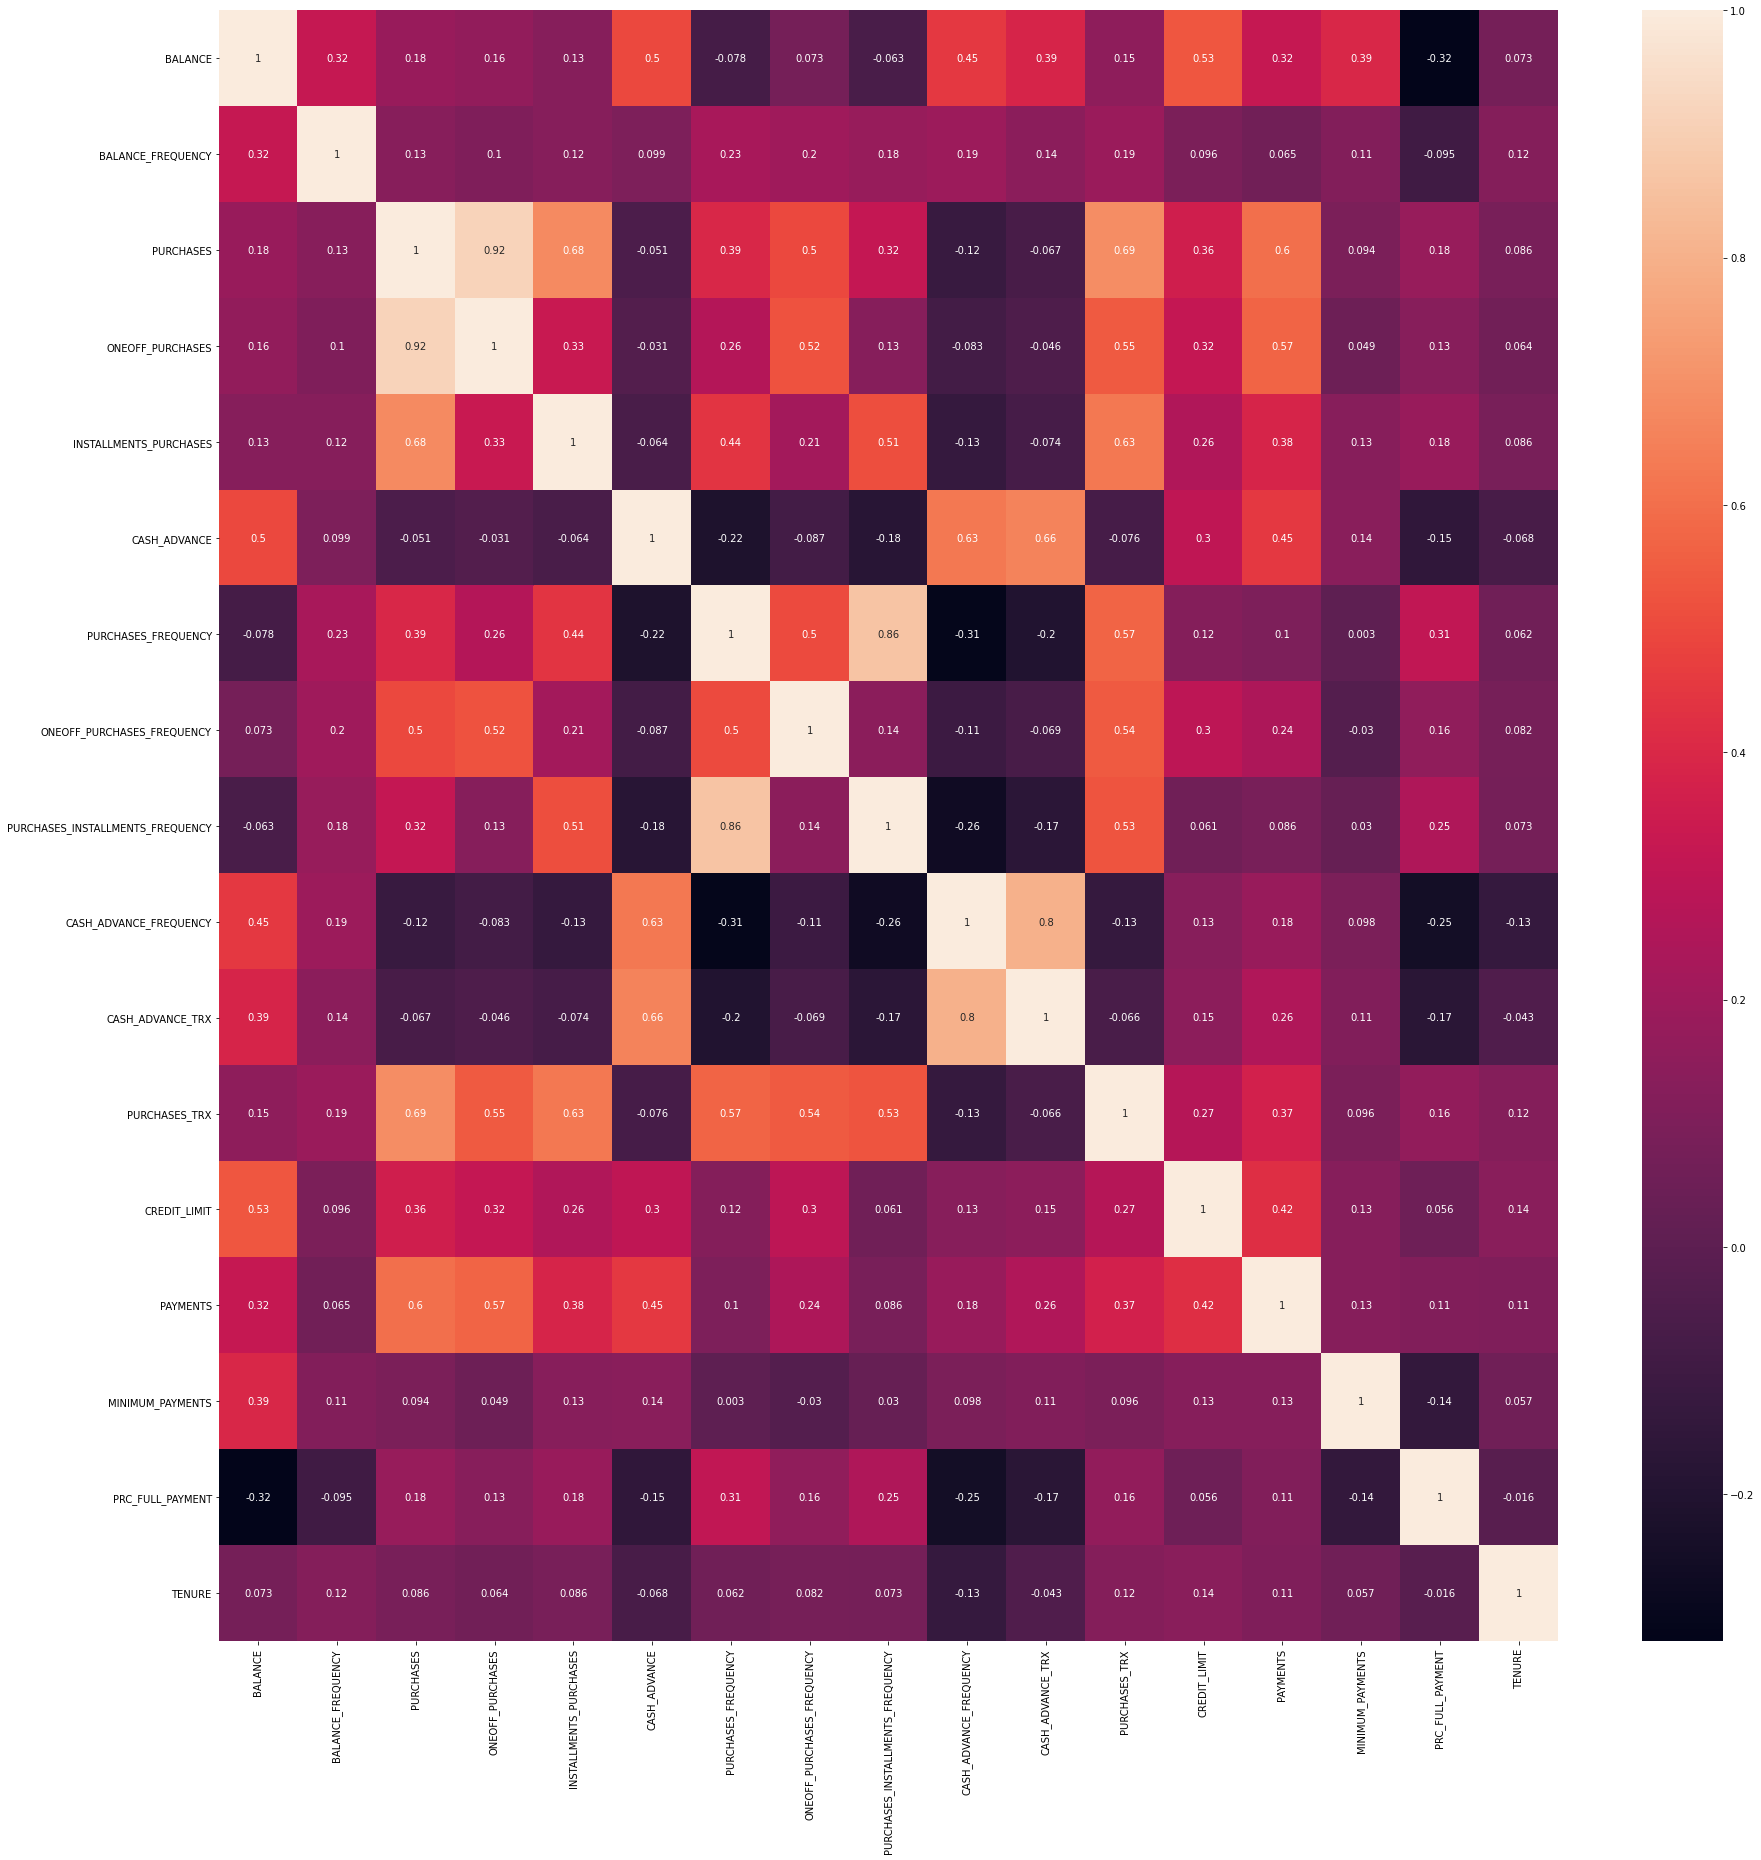

In [ ]:
correlation=creditcard_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation,annot=True)

In [ ]:
ss=StandardScaler()
creditcard_df_scaled=ss.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

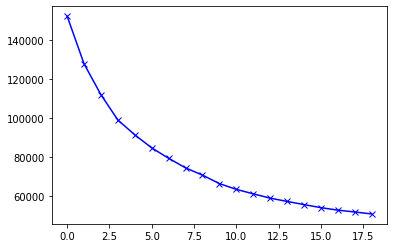

In [ ]:
#Finding the no. of cluster
#using elbow method

score_1=[]

for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  score_1.append(kmeans.inertia_)

plt.plot(score_1,'bx-')

#for wcss (within cluster square of sums ) calculation we use 'inertia_' attribute

In [ ]:
creditcard_7attri=creditcard_df_scaled[:,:7]

In [ ]:
creditcard_7attri.shape

(8950, 7)

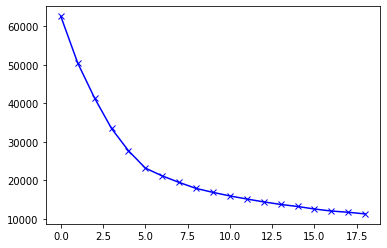

In [ ]:
score_1=[]

for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(creditcard_7attri)
  score_1.append(kmeans.inertia_)

plt.plot(score_1,'bx-')

In [ ]:
#Applying Kmeans to the dataframe

kmeans=KMeans(4)
kmeans.fit(creditcard_df_scaled)
labels=kmeans.labels_


In [ ]:
kmeans.cluster_centers_.shape

(4, 17)

In [ ]:
kmeans.cluster_centers_

array([[-2.65509413e-01, -3.68721257e-01, -3.43110023e-01,
        -2.30452980e-01, -3.87695614e-01, -1.82432849e-01,
        -7.97563742e-01, -3.89369186e-01, -7.14033122e-01,
        -1.01225848e-01, -1.64538216e-01, -4.74824623e-01,
        -3.34539970e-01, -2.61775188e-01, -1.19266423e-01,
        -2.58861118e-01, -5.28678153e-02],
       [ 1.45957775e+00,  3.84753065e-01, -2.34638427e-01,
        -1.63914013e-01, -2.53746975e-01,  1.68897201e+00,
        -5.04847568e-01, -2.12939102e-01, -4.50201244e-01,
         1.74594805e+00,  1.61714316e+00, -2.83579688e-01,
         8.38967661e-01,  6.03820830e-01,  4.90909814e-01,
        -4.06367280e-01, -9.71460234e-02],
       [ 9.54484507e-01,  4.62693629e-01,  3.12584465e+00,
         2.71325131e+00,  2.40646962e+00, -1.55090594e-01,
         1.13633760e+00,  1.79865349e+00,  1.06591778e+00,
        -3.19095705e-01, -1.70458235e-01,  3.00325068e+00,
         1.42988161e+00,  1.91909626e+00,  4.77420629e-01,
         4.54702830e-01,  3.2

In [ ]:
cluster_center=pd.DataFrame(data=kmeans.cluster_centers_ , columns=creditcard_df.columns)

In [ ]:
cluster_center

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.265509,-0.368721,-0.343110,-0.230453,-0.387696,-0.182433,-0.797564,-0.389369,-0.714033,-0.101226,-0.164538,-0.474825,-0.334540,-0.261775,-0.119266,-0.258861,-0.052868
1,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.838968,0.603821,0.490910,-0.406367,-0.097146
2,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140
3,-0.321755,0.242492,0.109083,0.000939,0.255974,-0.366732,0.983944,0.317283,0.874358,-0.463030,-0.360443,0.297022,-0.077076,-0.138802,-0.091816,0.395230,0.057654


In [ ]:
cluster_center=ss.inverse_transform(cluster_center)
cluster_center=pd.DataFrame(data=cluster_center,columns=creditcard_df.columns)
cluster_center

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1011.839396,0.789924,270.144981,209.932625,60.479311,596.300906,0.170250,0.086301,0.080662,0.114888,2.125974,2.907468,3277.256169,975.330332,586.261175,0.078002,11.446568
1,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,650.233383,0.269313,11.594474


In [ ]:
labels.min()

0

In [ ]:
labels.max()

3

In [ ]:
y_kmeans=kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([3, 0, 1, ..., 1, 3, 3], dtype=int32)

In [ ]:
creditcard_df_cluster=pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


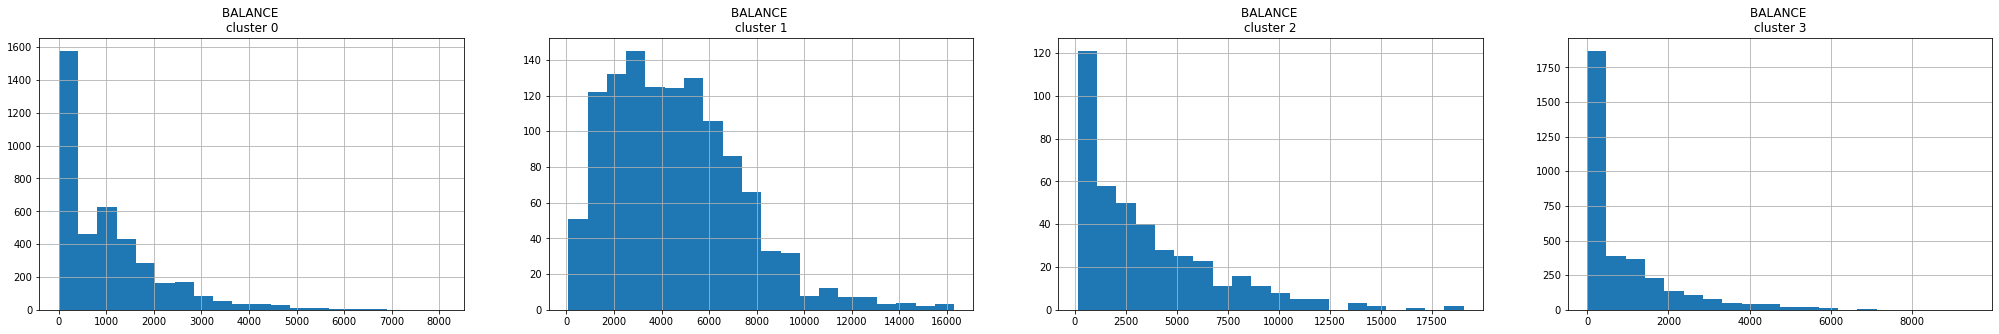

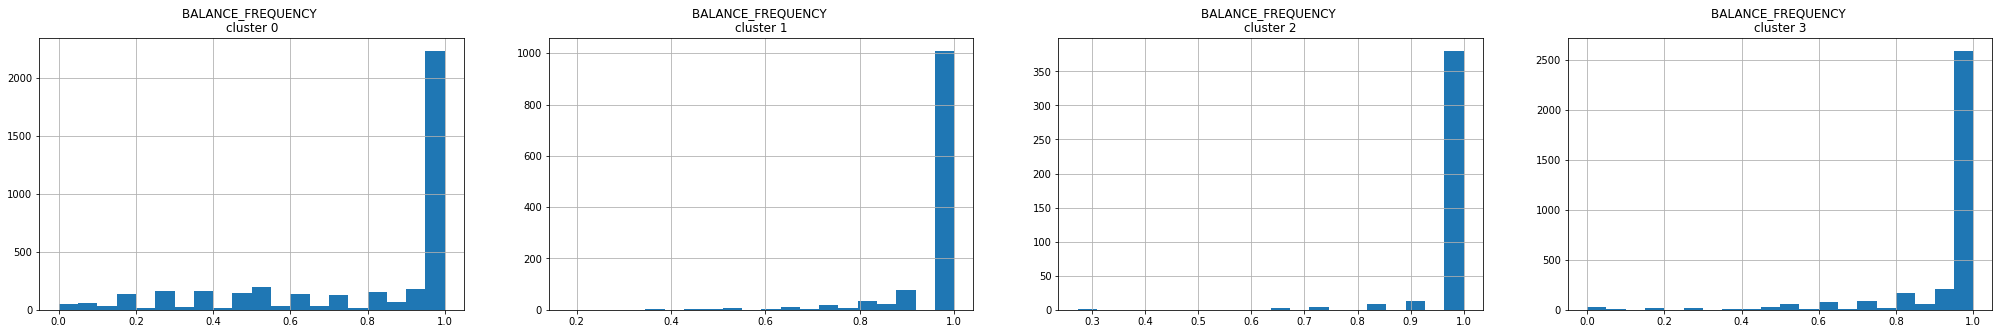

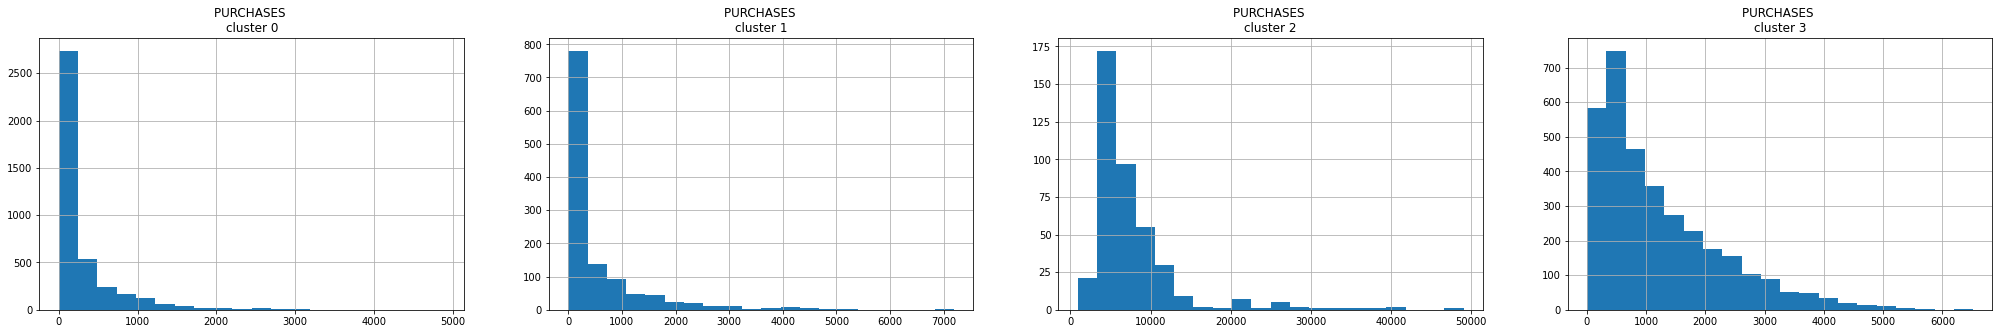

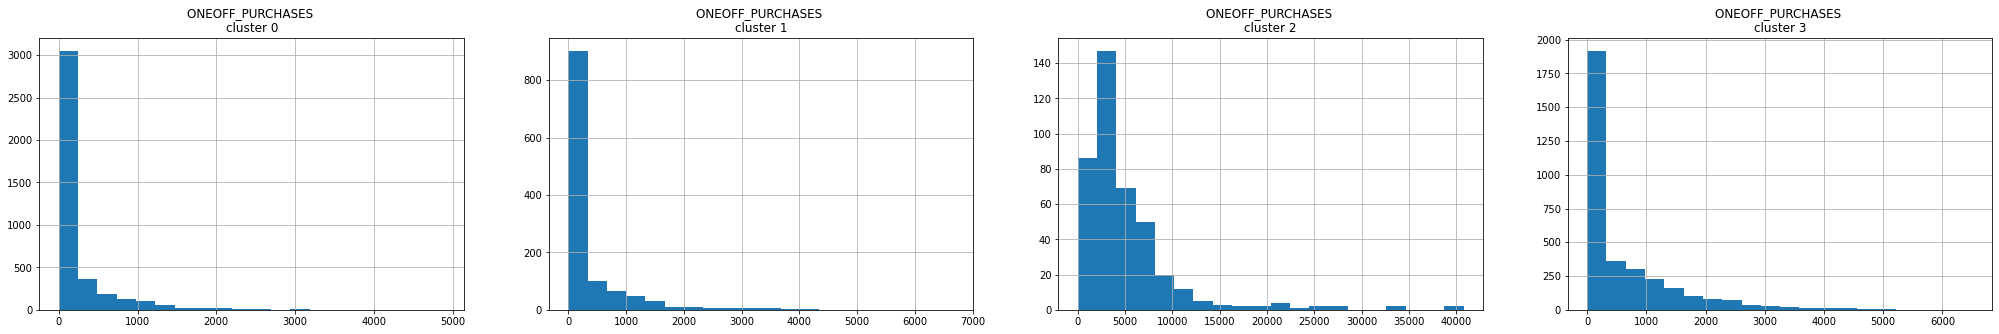

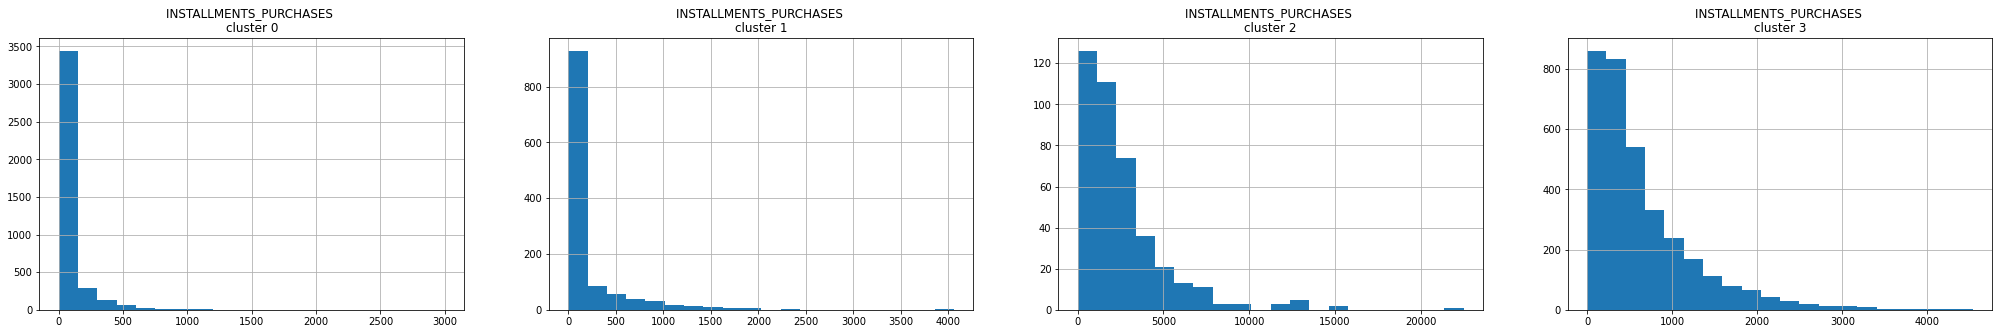

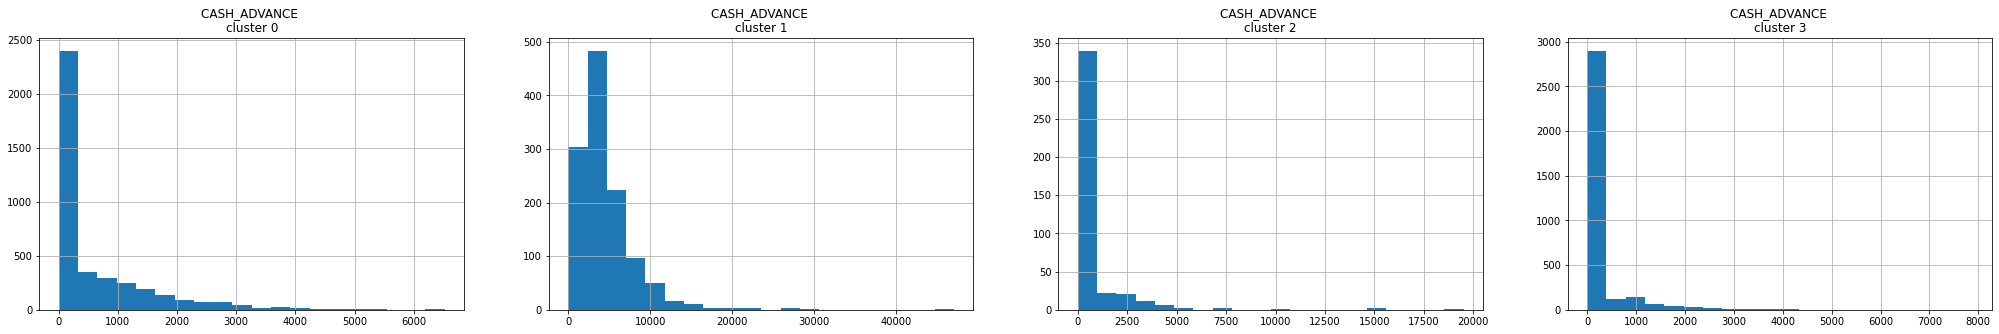

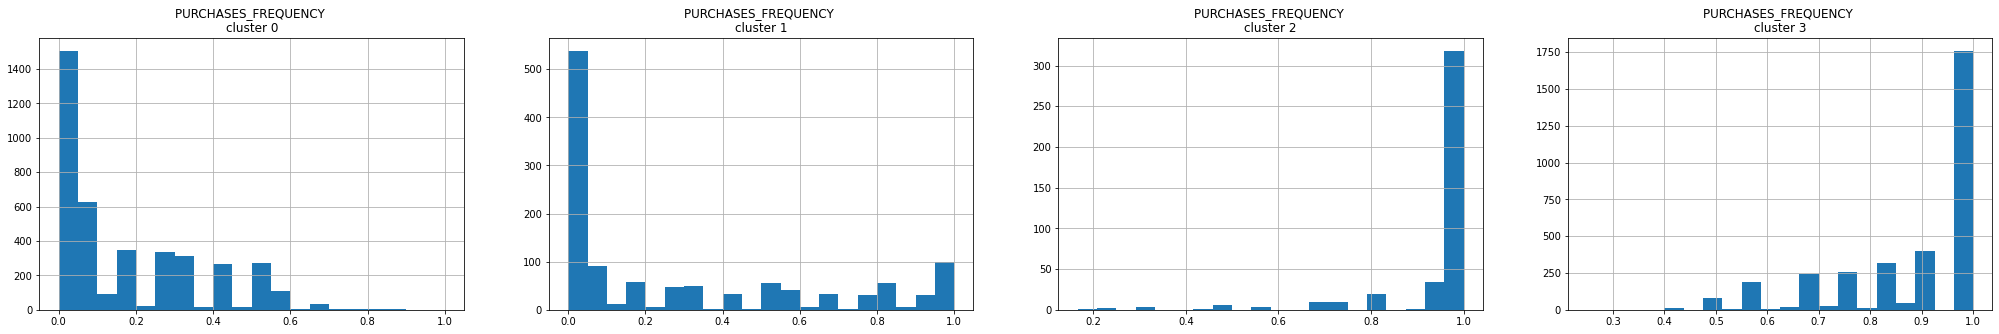

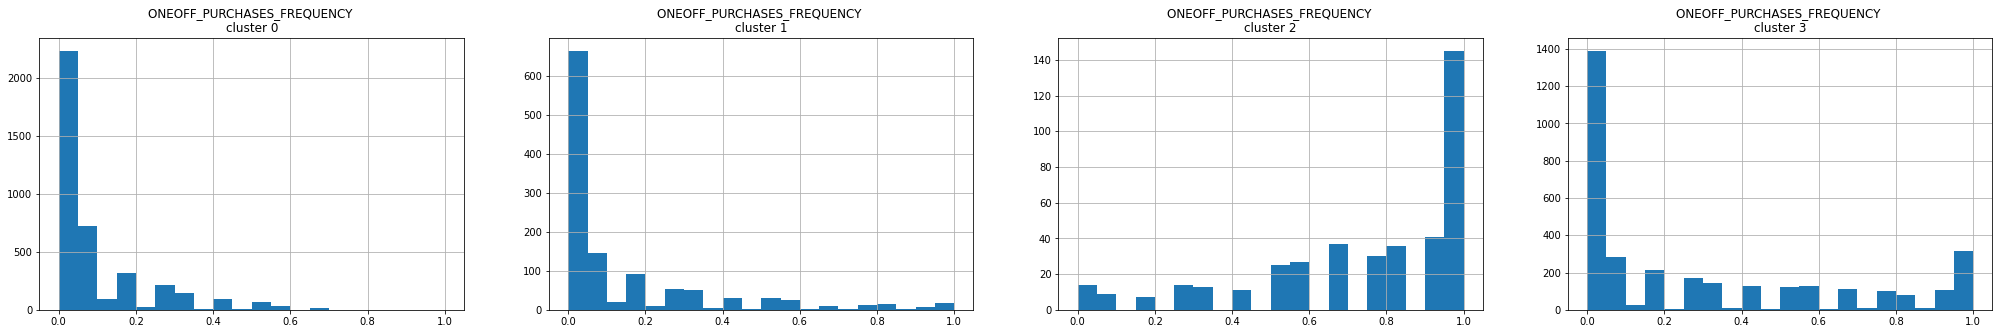

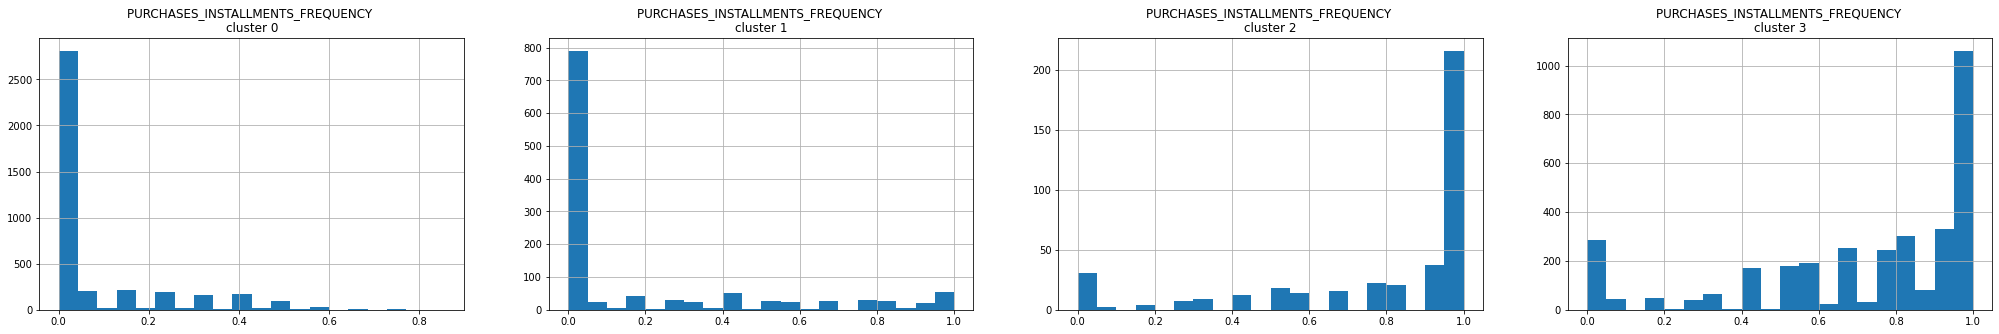

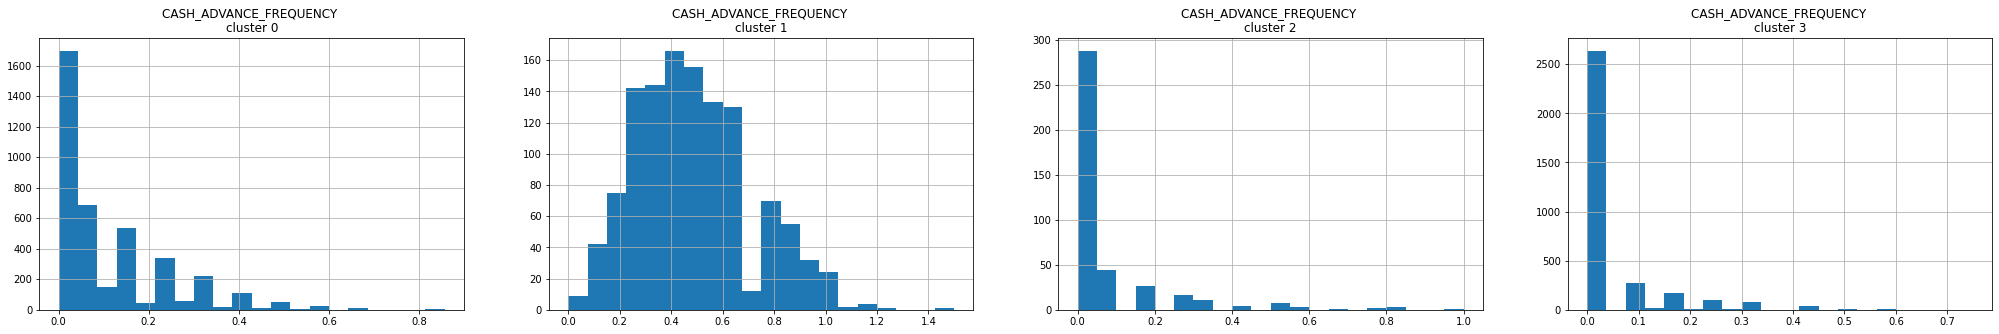

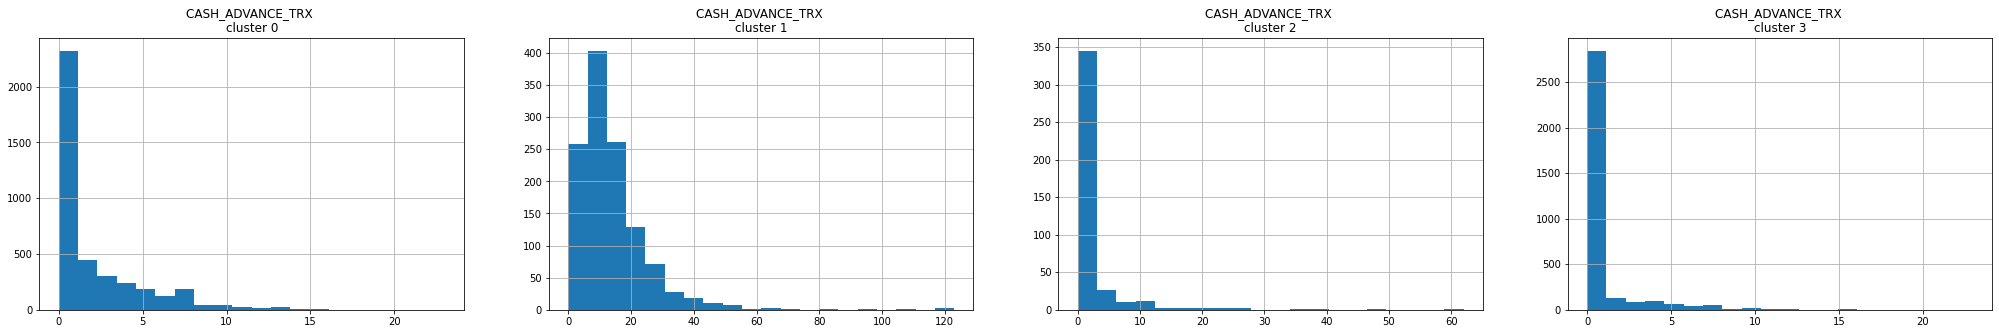

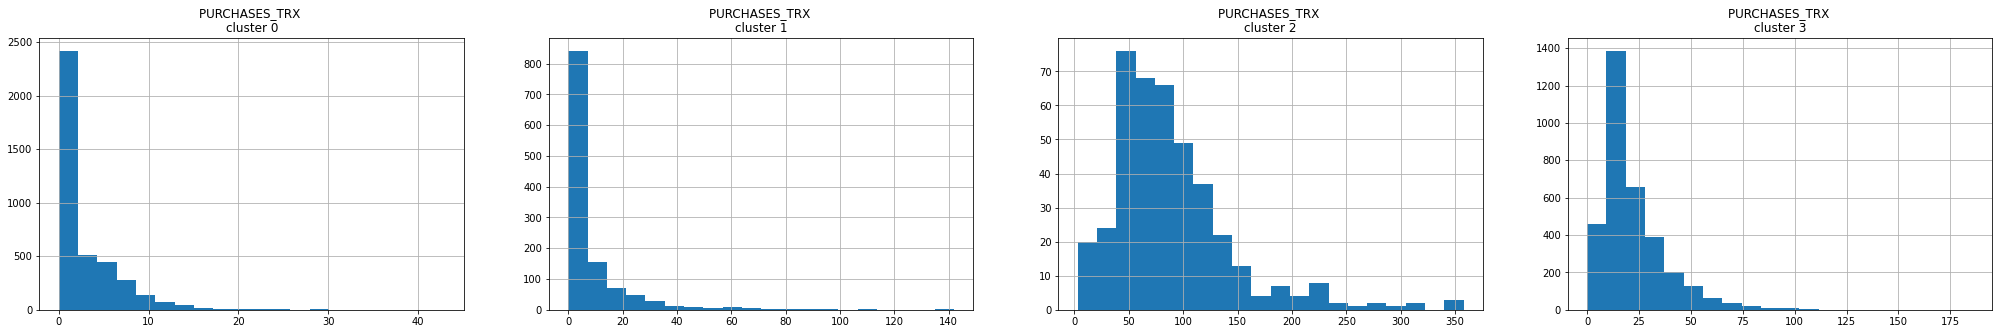

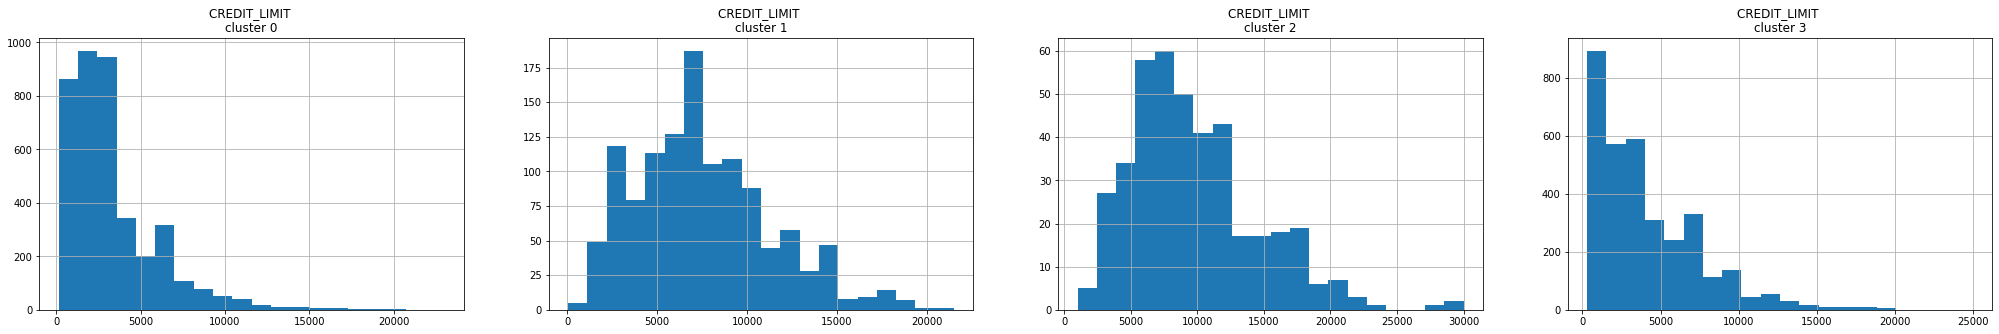

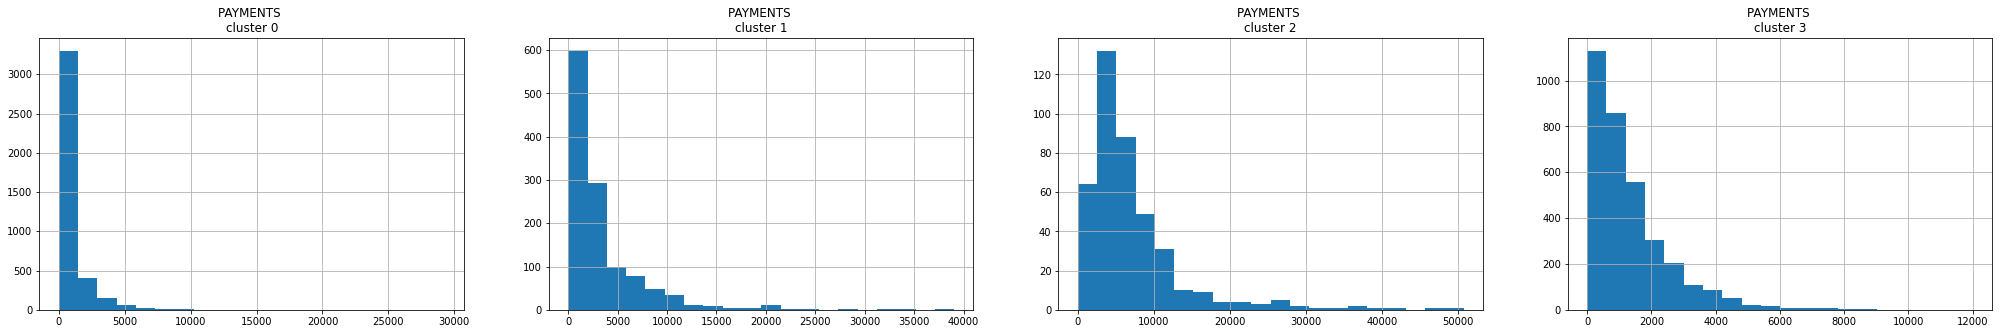

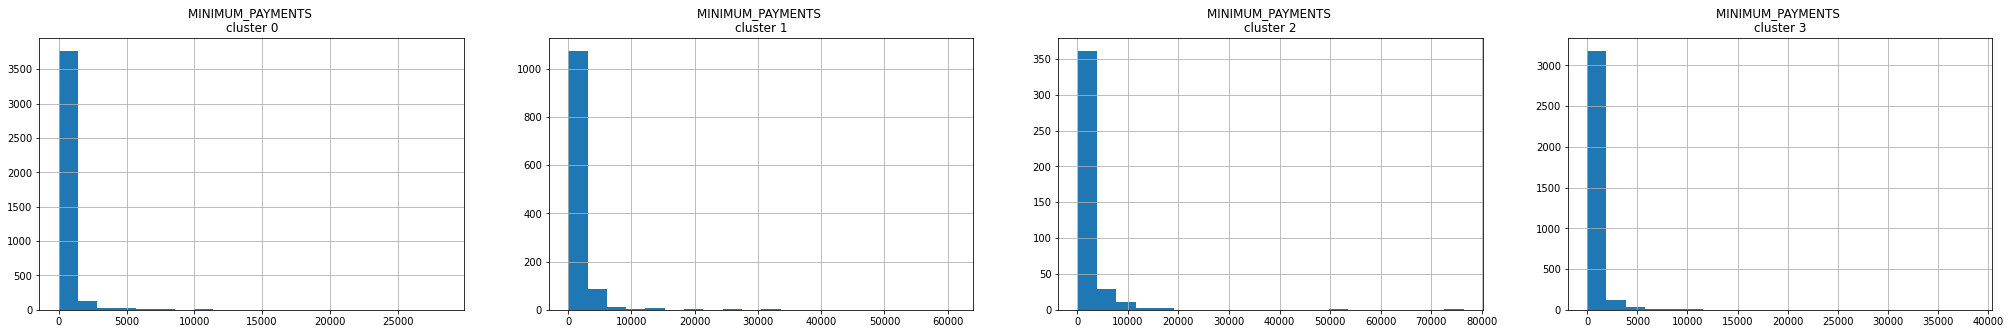

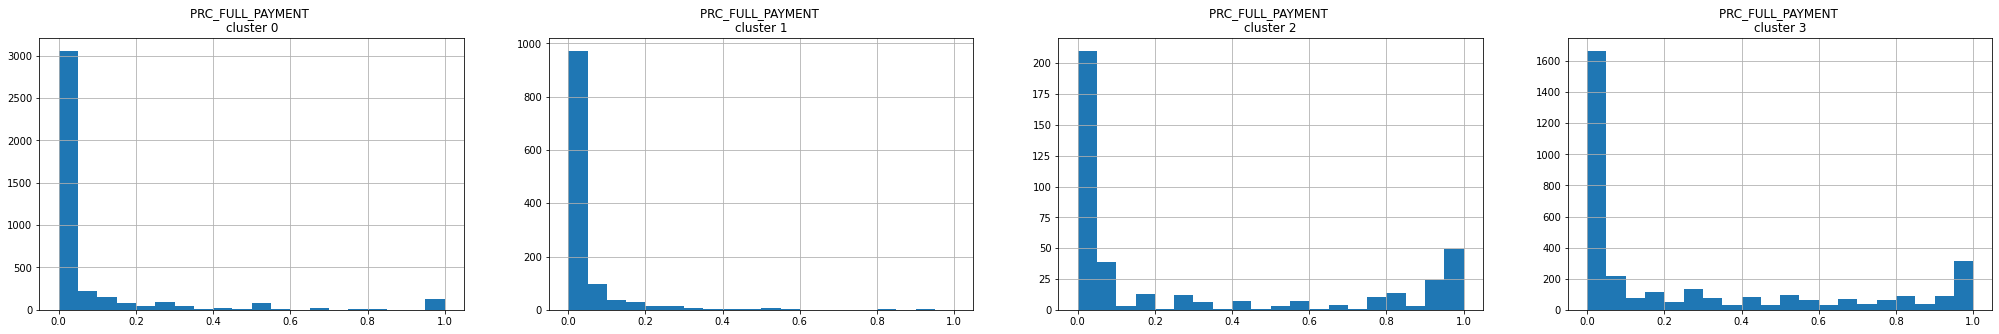

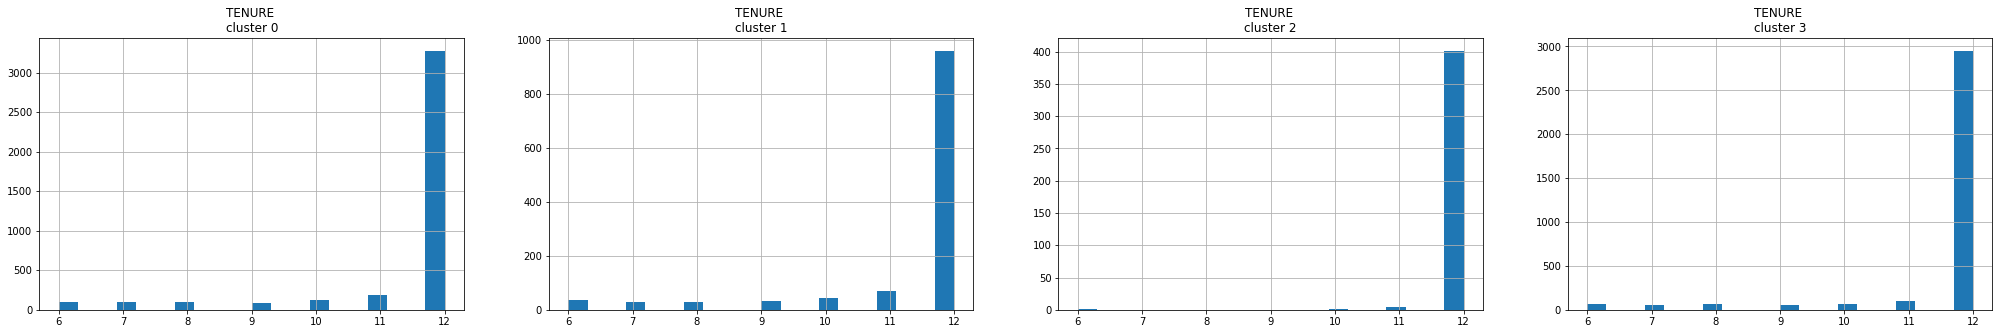

In [ ]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster=creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
    cluster[i].hist(bins=20)
    plt.title("{} \ncluster {}".format(i,j))


  plt.show()

In [ ]:
#applying Principal Component Analysis(PCA)

pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp


array([[-1.68222528, -1.07647321],
       [-1.13830858,  2.50641061],
       [ 0.96968512, -0.38350848],
       ...,
       [-0.92619936, -1.81076323],
       [-2.33655419, -0.65798073],
       [-0.55641667, -0.40044512]])

In [ ]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca_1','pca_2'])

pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)


In [ ]:
pca_df

,pca_1,pca_2,cluster
0,-1.682225,-1.076473,0
1,-1.138309,2.506411,1
2,0.969685,-0.383508,3
3,-0.873637,0.043121,0
4,-1.599436,-0.688590,0
...,...,...,...
8945,-0.359623,-2.016113,3
8946,-0.564369,-1.639120,3
8947,-0.926199,-1.810763,3
8948,-2.336554,-0.657981,0


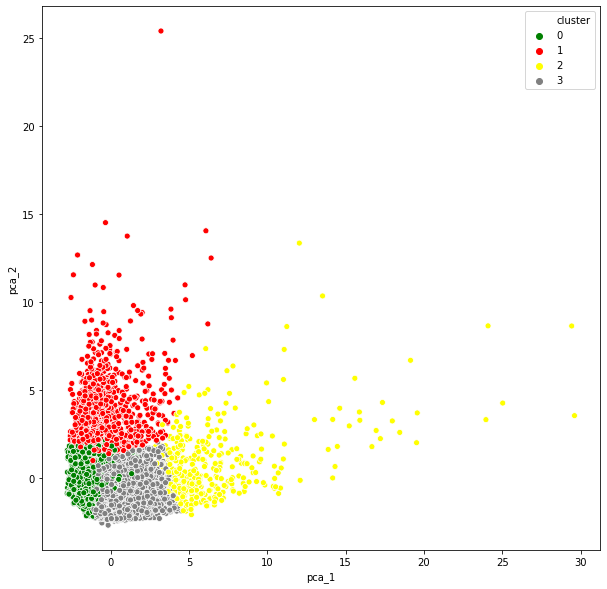

In [ ]:
#plot the cluster

plt.figure(figsize=(10,10))
sns.scatterplot(x='pca_1',y='pca_2',hue='cluster',data=pca_df,palette=['green','red','yellow','gray'])
plt.show()